## Anomaly datection using Kmeans from scikit-learn

###  1. Import the necessary packages 

In [9]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import pytz
import tzlocal
import pandas as pd
from pandas import DataFrame, Series
from pandas.io.json import json_normalize
from datetime import datetime, timedelta

### 2. Import the dataset and visualize it
This is Water Level data collected between the 11th of February 2021 and 25th of February 2021. It is an interesting piece data I have been collecting from one of the water_level sensors along River Muringato in Nyeri- Kenya

<function matplotlib.pyplot.show(*args, **kw)>

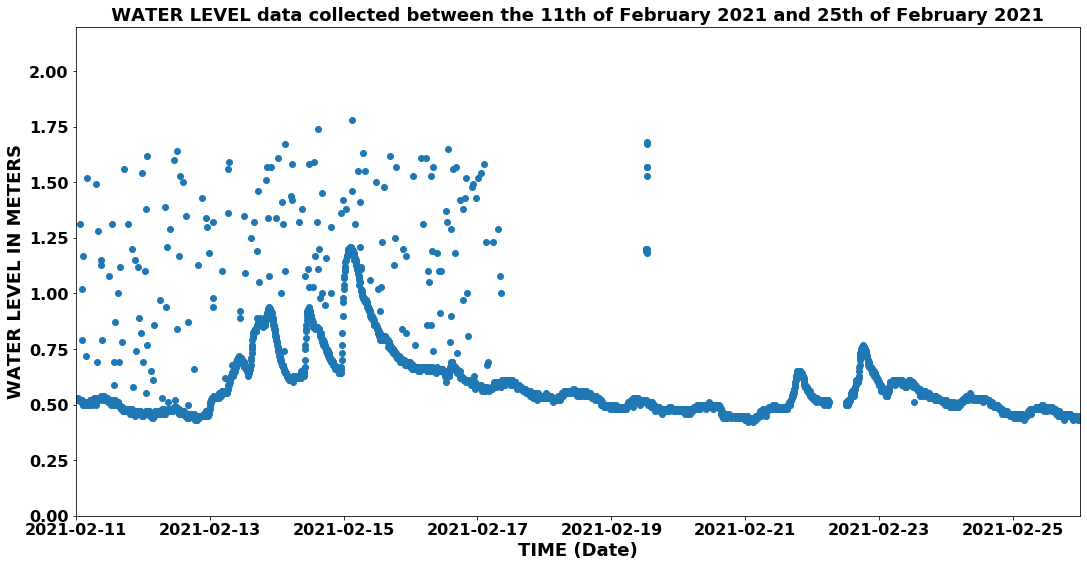

In [11]:
df = pd.read_csv('sample_dataset_waterlevel.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
plt.scatter(df['time'],df['Data'])
plt.title(' WATER LEVEL data collected between the 11th of February 2021 and 25th of February 2021 ',weight = 'bold', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-11 00:00:00'],['2021-02-25 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

### 3. spoting the anomalies
- On the Scatter plot above you can spot the anomalies on the first half. This anomalies were brought about by prototype mul-function after it was first depoyed.
- In the next couple of cells we will try to eliminate the anomalies using Kmeans
- Kmeans is basically a clustering algorithm that is used to find groups in data /cluster data which have not been explicitly labeled.
- After clustering, the desire clusters can be retained while the undesired are being scrapped off.

### 4. Clustering the whole dataset 

In [14]:
# silhouette_score is used to evaluate the optimum number of clusters needed for a particular dataset
water_level_array = np.array(df['Data']).reshape(-1, 1) # convert the dataframe column to an array and reshape it.
from sklearn.metrics import silhouette_samples, silhouette_score # import silhouette_samples, silhouette_score 
kmax = 10 # set the maximum number of clusters - running iterations
for k in range(2, kmax+1): # for loop to run the iterations and spit out the results
    kmeans = KMeans(n_clusters= k).fit(water_level_array) # Fitting the dataset in Kmeans 
    labels = kmeans.labels_ #Production of cluster labels
    silhouette_avg = silhouette_score(water_level_array, labels, metric = 'euclidean') # euclidean distance from the centre 
    print("For k_clusters =", k, "The average silhouette_score is :", silhouette_avg) # score and cluster
    sample_silhouette_values = silhouette_samples(water_level_array,labels)
    # select the k_clusters with the highest silhoutte_score == Hence k = 2


For k_clusters = 2 The average silhouette_score is : 0.7705439960934983
For k_clusters = 3 The average silhouette_score is : 0.666629016872429
For k_clusters = 4 The average silhouette_score is : 0.6360690430438656
For k_clusters = 5 The average silhouette_score is : 0.6411774043338905
For k_clusters = 6 The average silhouette_score is : 0.5811839482782253
For k_clusters = 7 The average silhouette_score is : 0.5824607055144939
For k_clusters = 8 The average silhouette_score is : 0.5817380295963405
For k_clusters = 9 The average silhouette_score is : 0.5904153464919671
For k_clusters = 10 The average silhouette_score is : 0.5918871329987252


#### 4.1. Plotting the diffrent clusters 

<function matplotlib.pyplot.show(*args, **kw)>

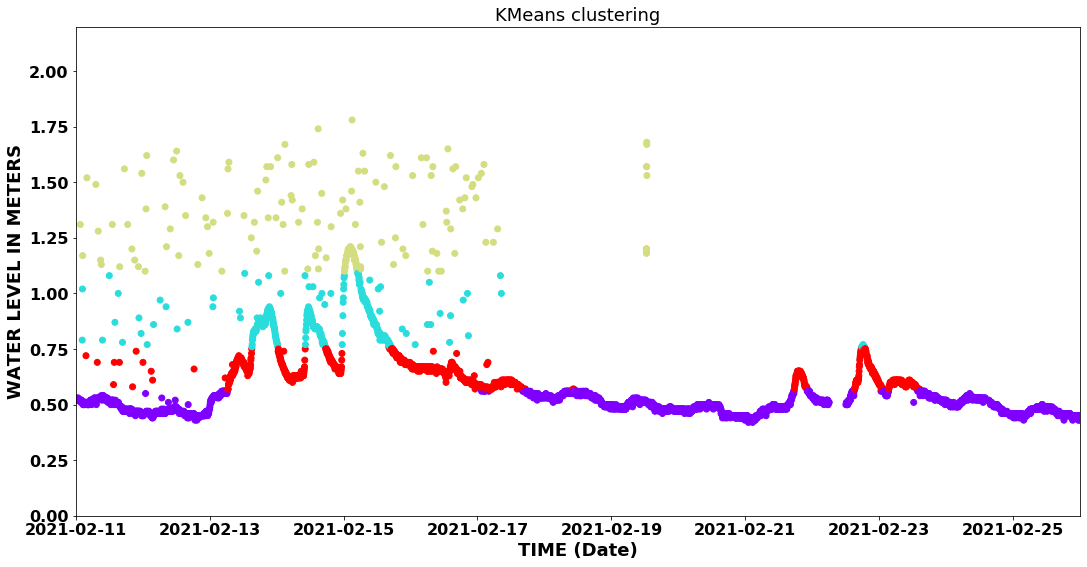

In [17]:
num_of_clusters =4 # number of clusters
water_level_pred = KMeans(n_clusters = num_of_clusters, random_state = 123).fit(water_level_array) # fitting the data
plt.scatter(df['time'],water_level_array, c=water_level_pred.labels_, cmap='rainbow') # plotting
plt.title('KMeans clustering', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-11 00:00:00'],['2021-02-25 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

## 5. NOTE
- Clustering cannot happen to the entire data set because some correct datapoints data points will be discarded if we choose some of the clusters
- What to do: cluster a shorter window of datapoints e.g a day and the stich the data frames together
- Below is the clustering of the 12th of Feb 2021